In [ ]:
"""Build a random forest classifier to predict the risk of heart disease based on a dataset of patient
information. The dataset contains 303 instances with 14 features, including age, sex, chest pain type,
resting blood pressure, serum cholesterol, and maximum heart rate achieved.
Dataset link: https://drive.google.com/file/d/1bGoIE4Z2kG5nyh-fGZAJ7LH0ki3UfmSJ/view?usp=share_link
"""

In [ ]:
"""Q1. Preprocess the dataset by handling missing values, encoding categorical variables, and scaling the numerical features if necessary."""

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 

In [2]:
df = pd.read_csv('dataset.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [9]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [4]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [5]:
X = df.drop('target',axis=1)
y = df['target']

In [6]:
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [8]:
y.value_counts()

1    165
0    138
Name: target, dtype: int64

In [ ]:
"""Q2. Split the dataset into a training set (70%) and a test set (30%)."""

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3, random_state=69)

In [11]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
"""Q3. Train a random forest classifier on the training set using 100 trees and a maximum depth of 10 for each
tree. Use the default values for other hyperparameters."""

In [12]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=100, max_depth=10)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

In [ ]:
"""Q4. Evaluate the performance of the model on the test set using accuracy, precision, recall, and F1 score."""

In [13]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.8351648351648352
[[34  7]
 [ 8 42]]
              precision    recall  f1-score   support

           0       0.81      0.83      0.82        41
           1       0.86      0.84      0.85        50

    accuracy                           0.84        91
   macro avg       0.83      0.83      0.83        91
weighted avg       0.84      0.84      0.84        91



In [ ]:
"""Q5. Use the feature importance scores to identify the top 5 most important features in predicting heart disease risk. Visualise the feature importances using a bar chart."""

In [29]:
# Retrieve feature importances and create a DataFrame
importance_scores = classifier.feature_importances_
feature_importances = pd.DataFrame(importance_scores, index=X.columns, columns=['Importance'])

# Sort the DataFrame by importance scores in descending order
sorted_feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

# # Select the top 5 most important features
top_5_features = sorted_feature_importances.head(5)


<AxesSubplot: ylabel='Importance'>

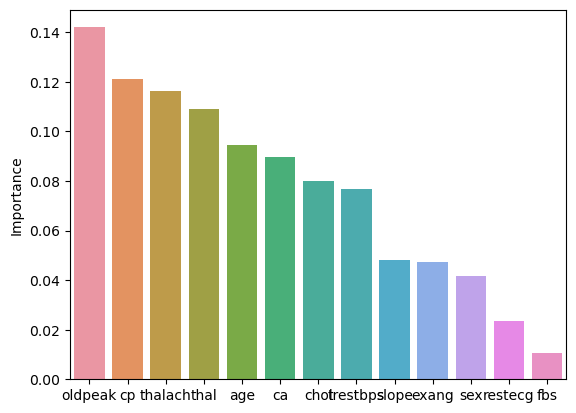

In [31]:
# Bar plot
sns.barplot(x=sorted_feature_importances.index, y=sorted_feature_importances['Importance'])

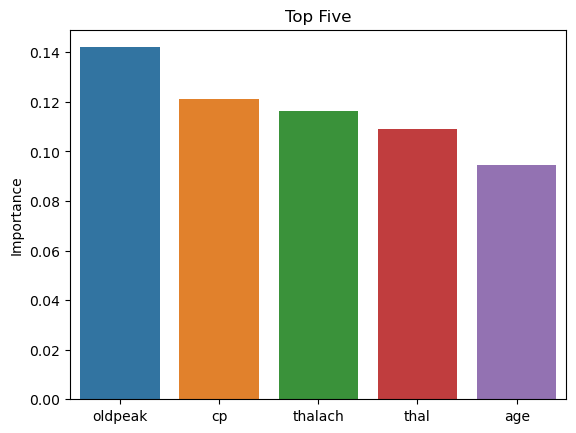

In [32]:
sns.barplot(x=top_5_features.index, y=top_5_features['Importance'])
plt.title("Top Five")
plt.show()

In [ ]:
"""Q6. Tune the hyperparameters of the random forest classifier using grid search or random search. Try
different values of the number of trees, maximum depth, minimum samples split, and minimum samples
leaf. Use 5-fold cross-validation to evaluate the performance of each set of hyperparameters."""

In [37]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for grid search
p = {
    'n_estimators': [50, 100, 200, 250],  
    'max_depth': [5, 10, 15],  
    'min_samples_split': [2, 5, 10, 15],  
    'min_samples_leaf': [1, 2, 4, 6, 8],
}

# Perform grid search with 5-fold cross-validation
grid_search = GridSearchCV(classifier, param_grid=p, scoring='accuracy', cv=5, verbose=3)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 240 candidates, totalling 1200 fits
[CV 1/5] END max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=0.814 total time=   0.1s
[CV 2/5] END max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=0.767 total time=   0.1s
[CV 3/5] END max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=0.786 total time=   0.1s
[CV 4/5] END max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=0.833 total time=   0.1s
[CV 5/5] END max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=0.857 total time=   0.1s
[CV 1/5] END max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.814 total time=   0.2s
[CV 2/5] END max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.767 total time=   0.2s
[CV 3/5] END max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.810 total time=   0.2s
[CV 4

GridSearchCV(cv=5, estimator=RandomForestClassifier(max_depth=10),
             param_grid={'max_depth': [5, 10, 15],
                         'min_samples_leaf': [1, 2, 4, 6, 8],
                         'min_samples_split': [2, 5, 10, 15],
                         'n_estimators': [50, 100, 200, 250]},
             scoring='accuracy', verbose=3)

In [40]:
"""Q7. Report the best set of hyperparameters found by the search and the corresponding performance
metrics. Compare the performance of the tuned model with the default model."""

#  best hyperparameters
print(grid_search.best_params_)

# Prediction
y_pred1 = grid_search.predict(X_test)

# Scores 
print(accuracy_score(y_test, y_pred1))
print(confusion_matrix(y_test, y_pred1))
print(classification_report(y_test, y_pred1))

{'max_depth': 5, 'min_samples_leaf': 8, 'min_samples_split': 2, 'n_estimators': 50}
0.8241758241758241
[[33  8]
 [ 8 42]]
              precision    recall  f1-score   support

           0       0.80      0.80      0.80        41
           1       0.84      0.84      0.84        50

    accuracy                           0.82        91
   macro avg       0.82      0.82      0.82        91
weighted avg       0.82      0.82      0.82        91



In [41]:
# Comparision of Accuracy Scores
print("Default:")
print(accuracy_score(y_test, y_pred))
print()
print("Hypertuned: ")
print(accuracy_score(y_test, y_pred1))

Default:
0.8351648351648352

Hypertuned: 
0.8241758241758241


In [39]:
"""Q8. Interpret the model by analysing the decision boundaries of the random forest classifier. Plot the
decision boundaries on a scatter plot of two of the most important features. Discuss the insights and
limitations of the model for predicting heart disease risk."""

two_important_features = ['oldpeak','cp']
X1 = df[two_important_features]
X1

,oldpeak,cp
0,2.3,3
1,3.5,2
2,1.4,1
3,0.8,1
4,0.6,0
...,...,...
298,0.2,0
299,1.2,3
300,3.4,0
301,1.2,0


In [69]:
y1 = df.target

rf_classifier = RandomForestClassifier()
rf_classifier.fit(X1, y1)


x_min, x_max = X1.iloc[:, 0].min() - 1, X1.iloc[:, 0].max() + 1
y_min, y_max = X1.iloc[:, 1].min() - 1, X1.iloc[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

# Make predictions for the entire grid
Z = rf_classifier.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

/opt/conda/lib/python3.10/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


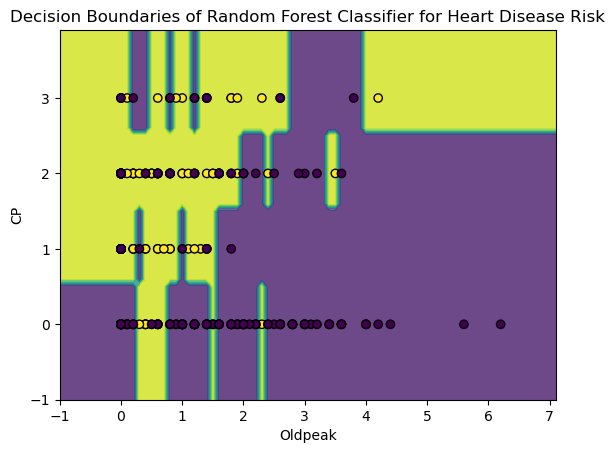

In [70]:
plt.figure()
plt.contourf(xx, yy, Z, alpha=0.8)
plt.scatter(X1.iloc[:, 0], X1.iloc[:, 1], c=y1, edgecolor='k')
plt.xlabel("Oldpeak")
plt.ylabel("CP")
plt.title("Decision Boundaries of Random Forest Classifier for Heart Disease Risk")
plt.show()